Our purpose : find a model able to find the good mate, and find a model able to predict drugs consumption.

First step: loading, exploring our data.

In [1]:
# modules and packages needed

import numpy as np
import pandas as pd



# convert csv in dataframe and see its shape and kind of variables inside.

data=pd.read_csv('profiles.csv')
print(data.columns)
print(data.shape)
print(data.dtypes)
print(data.head(5))

# watch variables objects.

for val in range(1, 6):
    print(data.iloc[:,val].value_counts(normalize=True, dropna=False))
    
for val in range(19, 31):
    print(data.iloc[:,val].value_counts(normalize=True, dropna=False))
    
print(data['ethnicity'].value_counts(normalize=True, dropna=False))

# see what is written in the essay first row.

for val in range(10):
    print(data[f'essay{val}'][0])
    
for val in range(10):
    print(data[f'essay{val}'][1])
    
    
print(data.job.nunique())



Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
(59946, 31)
age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex         

So we have a dataframe with 31 variables and most of them are string (height, income, age are int or float).Now we could draw some graphs.

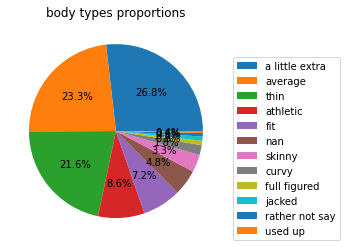

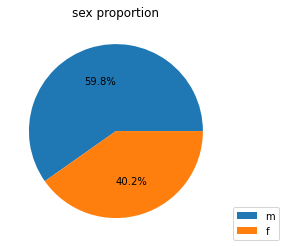

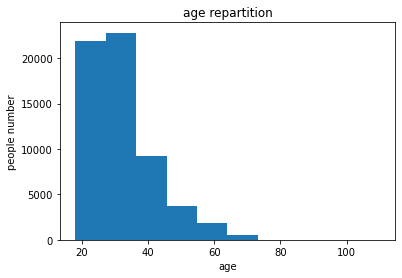

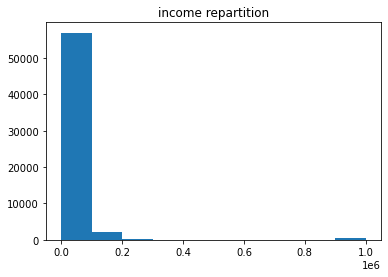

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('body types proportions')
plt.pie(data.body_type.value_counts(normalize=True), autopct='%1.1f%%')
plt.legend(data.body_type.unique(), loc=(1.04, 0))
plt.show()
plt.clf()

plt.title('sex proportion')
plt.pie(data.sex.value_counts(normalize=True), autopct='%1.1f%%')
plt.legend(data.sex.unique(), loc=(1.04, 0))
plt.show()
plt.clf()
          
plt.title('age repartition')
plt.xlabel('age')
plt.ylabel('people number')
plt.hist(data.age)
plt.show()
plt.clf()

plt.title('income repartition')
plt.hist(data.income)
plt.show()
plt.clf()






second step: convert our data. We have several kinds of variables:

-Quantitative and discrete: age, income

-Quantitative and continuous: height

-Object which are in fact categorical and ordinal: drinks, drugs, smokes, status

-Object which are in fact categorical and nominal: body_type, diet, education (maybe a little ordinal too...), location, offspring, orientation, pets, religion, sign, speaks (we will trat it apart because of ()), ethnicity, job

-Objects which can be ordinal too in a way: diet, education (but ùaybe too complex to treat it by that way), offspring, religion, sign, speaks.

-Binomial: sex

-time: last_online



In [3]:
# First, categorical and ordinal, binomial.

# Drinks

data.drinks=pd.Categorical(data['drinks'], ['nan','not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'], ordered=True)
data['drinks']= data['drinks'].cat.codes
print(data['drinks'].head())

# Drugs

data.drugs=pd.Categorical(data['drugs'], ['nan','never', 'sometimes', 'often'], ordered=True)
data['drugs']=data['drugs'].cat.codes
print(data['drugs'].head())

# Smokes

data.smokes=pd.Categorical(data['smokes'], ['nan','no', 'sometimes', 'when drinking', 'yes', 'trying to quit'], ordered=True)
data['smokes']=data['smokes'].cat.codes
print(data['smokes'].head())

# Status

data.status=pd.Categorical(data['status'], ['unknown', 'single', 'available', 'seeing someone', 'married'], ordered=True)
data['status']=data['status'].cat.codes
print(data['status'].head())

# Sex

data['sex']=data['sex'].map({'m': 1, 'f': 0})
print(data['sex'].head())


print(data.shape)


0    3
1    4
2    3
3    3
4    3
Name: drinks, dtype: int8
0    1
1    2
2   -1
3   -1
4    1
Name: drugs, dtype: int8
0    2
1    1
2    1
3    1
4    1
Name: smokes, dtype: int8
0    1
1    1
2    2
3    1
4    1
Name: status, dtype: int8
0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64
(59946, 31)


In [4]:
# second, categorical and nominal.

# Body_type, education, location, orientation, ethnicity, job
# Before doing one hot encoding, we simplify some variables to avoid a high range of dimensions.

# For body type

def body_simplifier(var):
    
    if ((var=='average') or (var=='fit') or (var=='athletic') or (var=='thin') or (var=='curvy') or (var=='a little extra')
    or (var=='skinny') or (var=='full figured')):
        
        return var
    
    else:
        
        return 'other_body'

data['body_type']=data['body_type'].map(lambda x: body_simplifier(x))

# For education

def education_simplifier(var):
    
    education_list=['graduated from college/university', 'graduated from masters program', 'working on masters program', 'working on college/university',
                   'graduated from two-year college', 'graduated from high school', 'graduated from ph.d program', 
                   'graduated from law school', 'working on two-year college', 'dropped out of college/university', 
                   'working on ph.d program', 'college/university', 'graduated from space camp']
    
    if var not in education_list:
        
        return 'other_education'
    
    else:
        
        return var
    
data['education']=data['education'].map(lambda x: education_simplifier(x))


# For location

def location_simplifier(var):
    
    location_list=['san francisco, california', 'oakland, california', 'berkeley, california'
                  'san mateo, california', 'palo alto, california']
    
    if var not in location_list:
        
        return 'other_location'
    
    else:
        
        return var
    
data['location']=data['location'].map(lambda x: location_simplifier(x))

# For ethnicity

def ethnicity_simplifier(var):
    
    ethnicity_list=['white', 'asian', 'hispanic / latin', 'black']
    
    if var not in ethnicity_list:
        
        return 'other_ethnicity'
    
    else:
        
        return var
    
data['ethnicity']=data['ethnicity'].map(lambda x: ethnicity_simplifier(x))

# For job

def job_simplifier(var):
    
    job_list=['rather not say', 'transportation', 'unemployed', 'retired', 'military']
    
    if var not in job_list:
        
        return var
    
    else:
        
        return 'other_job'
    
data['job']=data['job'].map(lambda x: job_simplifier(x))
print(data.job.value_counts())
                                       
    
data=pd.get_dummies(data=data, columns=['body_type', 'education', 'location', 'orientation', 'ethnicity', 'job'])


print(data.shape)
print(data.columns)


other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
other_job                            1529
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
Name: job, dtype: int64
(59946, 77)
Index(['age', 'diet', 'drinks', 'drugs', 'essay0', 'essay1', 'essay2',
       'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9',
       'height', 'income', 'last_online', 'offspring', 'pets', 'religion',
       'sex', 'sign', 'smok

So now we have increased size in width, we reach 77 columns. Now we will treat variables both nominal and ordinal, split useful info nominal/ordinal.

In [5]:
# diet

data['split_diet']=data.diet.str.split(' ')
data['diet_importance']=data.split_diet.str.get(0)
print(data['diet_importance'].head())

def ordering(var):
    
    if var=="mostly":
        var=1
    elif var=="stricly":
        var=2
    else:
        var=0
    return var
        
data['diet_importance']=data['diet_importance'].map(lambda x:ordering(x))
print(data['split_diet'].head())  


def diet_way(var):
    
    if type(var)==type(list()):
        
        if len(var)>1:
            
            new_var=var[1]
        
        else:
            
            new_var=var[0]
            
    else:
        
        new_var=np.nan
        
    return new_var
    
    
data['diet_type']=data['split_diet'].map(lambda x:diet_way(x))
print(data['diet_type'].head())

data=pd.get_dummies(data, columns=['diet_type'])


# Religion

data['split_religion']=data.religion.str.split(' ')
data['religion_type']=data.split_religion.str.get(0)
print(data['religion_type'].head())
print(data['split_religion'][0:20])


def religion_imp(var):
    
    if type(var)==type(list()):
        
        if len(var)==1:
            
            new_var=0
            
        else:
            
            if var[1]=='and':
                
                if var[2]=='laughing':
                    
                    new_var=1
                    
                elif var[2]=='somewhat':
                    
                    new_var=3
                    
                elif var[2]=='very':
                    
                    new_var=4
                    
            elif var[1]=='but':
                
                new_var=2
    
    else:
        
        new_var=np.nan
        
    return new_var


data['religion_importance']=data['split_religion'].map(lambda x:religion_imp(x))
print(data['religion_importance'].head())

data=pd.get_dummies(data, columns=['religion_type'])

# Sign

data['split_sign']=data.sign.str.split(' ')
data['sign_type']=data.split_sign.str.get(0)

def sign_imp(var):
    
    if type(var)==type(list()):
        
        if len(var)==1:
            
            new_var=0
            
        else:
            
            if var[-1]=='matter':
                
                new_var=1
                
            elif var[-1]=='about':
                
                new_var=2
                
            elif var[-1]=='lot':
                
                new_var=3
                
    else:
        
        new_var=np.nan
        
    return new_var


data['sign_importance']=data['split_sign'].map(lambda x:sign_imp(x))
data=pd.get_dummies(data, columns=['sign_type'])

# Offspring

data['split_offspring']=data.offspring.str.split(' ')
print(data['split_offspring'].value_counts(normalize=True))


def kids_or_not_kids(var):
    global var_2
    if type(var)!=type(list()):
        
        var_2=np.nan
        
    else:
        
        if (var[0]=='doesn&rsquo;t') or (var[0]=='wants') or (var[0]=='might'):
            
            var_2=0
            
        elif (var[0]=='has') and (var[1]=='a'):
            
            var_2=1
            
        elif (var[0]=='has') and (var[1]=='kids'):
            
            var_2=2
            
    return var_2
    
    
   

data['have_kids']=data['split_offspring'].map(lambda x:kids_or_not_kids(x))
            
print(data['have_kids'].value_counts(normalize=True))
  
    
def more_or_not(var):
    global var_3
    if type(var)!=type(list()):
        
        var_3=np.nan
        
    else:
        
        sequence='-'.join(var)
        
        if ((sequence.find('might-want-them')!=-1) or (sequence.find('but-wants-them')!=-1) or (sequence.find('wants-kids')!=-1) or (sequence.find('might-want-more')!=-1) or (sequence.find('wants-more')!=-1)):
            
            var_3=1
        
        elif (sequence.find('want-any')!=-1) or (sequence.find('doesn&rsquo;t-want-more')!=-1):
            
            var_3=0
            
    return var_3


data['want_more_kids']=data['split_offspring'].map(lambda x:more_or_not(x))
print(data['want_more_kids'].value_counts(normalize=True))
        

# Pets

def cats_have(var):
    
    if type(var)!=type(list()):
        
        var_4=np.nan
        
    else:
        
        if (var.find('has cats')!=-1):
            
            var_4=1
            
        else:
            var_4=0
            
    return var_4


data['have_cats']=data['pets'].map(lambda x:cats_have(x))

def dogs_have(var):
    
    if type(var)!=type(list()):
        
        var_5=np.nan
        
    else:
        
        if (var.find('has dogs')!=-1):
            
            var_5=1
            
        else:
            
            var_5=0
            
    return var_5

data['have_dogs']=data['pets'].map(lambda x:dogs_have(x))

def hate_cats(var):
    
    if type(var)!=type(list()):
        
        var_6=np.nan
        
    else:
        
        if var.find('dislikes cats')!=-1:
            
            var_6=1
            
        else:
            
            var_6=0
            
    return var_6


def hate_dogs(var):
    
    if type(var)!=type(list()):
        
        var_7=np.nan
        
    else:
        
        if var.find('dislikes dogs')!=-1:
            
            var_7=1
            
        else:
            var_7=0
            
    return var_7

data['dislike_cats']=data['pets'].map(lambda x:hate_cats(x))
data['dislike_dogs']=data['pets'].map(lambda x:hate_dogs(x))

data=data.drop(['pets', 'split_diet', 'split_religion', 'split_sign', 'split_offspring', 'diet', 'religion', 'sign', 'offspring'], axis=1)



# Speaks 

def several_langages(var):
    
    langage_number=0
    
    if var!=np.nan:
        
        var=str(var)
        var=var.split(',')
        langage_number+=len(var)
        
    else:
        
        var=np.nan
        
    return langage_number

data['langages_known']=data['speaks'].map(lambda x:several_langages(x))


def quality_langage(var):
    
    quality_points=0
    
    if var!=np.nan:
        
        var=str(var)
        var=var.split(',')
        
        for val in var:
            
            if val.find('fluently')!=-1:
                
                quality_points+=3
                
            elif val.find('okay')!=-1:
                
                quality_points+=2
                
            elif val.find('poorly')!=-1:
                
                quality_points+=1
                
            else:
                
                quality_points+=0
                
    else:
        
        var='nan'
        
    return quality_points


data['langages_level']=data['speaks'].map(lambda x:quality_langage(x))
                
data=data.drop(['speaks', 'last_online'], axis=1) 

# we count "nan" number per column

nan_number=[]
column=[]

for val in data.columns:
    
    if data[val].isna().sum(axis=0)>0:
        
       column.append(val)
       nan_number.append(data[val].isna().sum(axis=0))
    
nan_counter=pd.DataFrame({'var_name': column, 'nan_sum': nan_number})
print(nan_counter)
    
# We find that some variables have too much nan to be used. We could keep
# 'height' (only 3 nan) and maybe at least religion_importance even if we have
# 20226 nan on that variable. Finally i get rid of it because in our data
# we can keep religion info with diet :the most of time for someone if religion 
# is important, diet follows.


data_text=data[[f'essay{val}' for val in range(10)]]   


data=data.drop(['have_kids','want_more_kids', 'have_cats', 'have_dogs', 'dislike_dogs', 'dislike_cats', 'sign_importance', 'religion_importance'], axis=1)          
data=data.drop([f'essay{val}' for val in range(10)], axis=1)
data=data.dropna(axis=0)   
        
        
        
print(data.shape)
print(data.columns)


    
    

0      strictly
1        mostly
2      anything
3    vegetarian
4           NaN
Name: diet_importance, dtype: object
0    [strictly, anything]
1         [mostly, other]
2              [anything]
3            [vegetarian]
4                     NaN
Name: split_diet, dtype: object
0      anything
1         other
2      anything
3    vegetarian
4           NaN
Name: diet_type, dtype: object
0    agnosticism
1    agnosticism
2            NaN
3            NaN
4            NaN
Name: religion_type, dtype: object
0          [agnosticism, and, very, serious, about, it]
1      [agnosticism, but, not, too, serious, about, it]
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                             [atheism]
6                                                   NaN
7                                        [christianity]
8     [christianity, but, not, too, seriou

Now we have a dataset of 90 columns and 59943 rows without essay (data_text) data. We now have to treat them and change it in vectors. After have changed essay data into vectors, we will do unsupervised learning on it to label them.In fact from string data, we will get a number per row, to simplify all the thing.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

import re

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import ngrams
import nltk


data_text=data_text.fillna('', axis=1)

data['corpus']=data_text.apply(lambda row: row['essay0']+row['essay1']+row['essay2']+row['essay3']+row['essay4']+row['essay5']+row['essay6']+row['essay7']+row['essay8']+row['essay9'], axis=1)
        


def nlp_preprocess(var):
    
    
    noise_removal=re.sub(r'[\.\,\:\;\!\?\<\>\/\(\)\{\}\"\']', '', var)
    noise_removal=noise_removal.lower()
    
    tokenized=word_tokenize(noise_removal)
    
    stemmer=PorterStemmer()
    stemmed=[stemmer.stem(token) for token in tokenized]
    
    lemmatizer=WordNetLemmatizer()
    lemmatized=[lemmatizer.lemmatize(token) for token in stemmed]
    
    stop_words=set(stopwords.words('english'))
    reminder=[word for word in lemmatized if word not in stop_words]
    
    reminder=" ".join(reminder)

    
    return reminder



data['corpus']=data['corpus'].map(lambda x: nlp_preprocess(x))


vectorizer=TfidfVectorizer(ngram_range=(1, 1), max_features=1000)
data_corpus=vectorizer.fit_transform(data['corpus'])
data_corpus=data_corpus.toarray()

print(data_corpus.shape)
print(data.shape)
print(vectorizer.vocabulary_)



(59943, 1000)
(59943, 91)
{'mebr': 536, 'br': 107, 'would': 982, 'love': 513, 'think': 887, 'wa': 941, 'kind': 466, 'intellectu': 439, 'either': 249, 'smart': 787, 'guy': 374, 'cant': 122, 'say': 741, 'tell': 872, 'differ': 219, 'talk': 861, 'idea': 422, 'instead': 438, 'like': 498, 'friend': 335, 'mine': 551, 'hous': 413, 'favorit': 295, 'word': 978, 'way': 951, 'weird': 956, 'choic': 141, 'know': 471, 'thing': 885, 'life': 495, 'better': 90, 'seek': 751, 'make': 523, 'littl': 503, 'everyday': 271, 'product': 681, 'got': 362, 'shoe': 768, 'consid': 170, 'five': 314, 'year': 990, 'old': 611, 'probabl': 678, 'decid': 206, 'onli': 614, 'wear': 952, 'dress': 238, 'youbr': 995, 'realli': 709, 'seriou': 758, 'deep': 207, 'convers': 174, 'silli': 773, 'stuff': 841, 'light': 497, 'heart': 391, 'kiss': 469, 'dont': 231, 'funni': 343, 'abl': 7, 'laugh': 483, 'mind': 550, 'smile': 789, 'still': 829, 'work': 979, 'cool': 176, 'let': 492, 'wind': 967, 'point': 664, 'read': 704, 'thi': 884, 'guess'

Now we are able to use kmeans on data_corpus. After that we will merge labels finds with data to finish preparing our dataset for modeling.

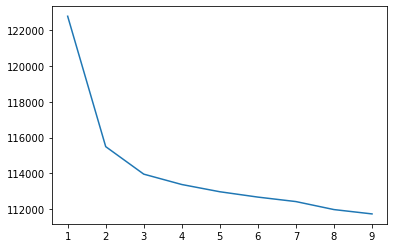

Index(['age', 'drinks', 'drugs', 'height', 'income', 'sex', 'smokes', 'status',
       'body_type_a little extra', 'body_type_athletic', 'body_type_average',
       'body_type_curvy', 'body_type_fit', 'body_type_full figured',
       'body_type_other_body', 'body_type_skinny', 'body_type_thin',
       'education_college/university',
       'education_dropped out of college/university',
       'education_graduated from college/university',
       'education_graduated from high school',
       'education_graduated from law school',
       'education_graduated from masters program',
       'education_graduated from ph.d program',
       'education_graduated from space camp',
       'education_graduated from two-year college',
       'education_other_education', 'education_working on college/university',
       'education_working on masters program',
       'education_working on ph.d program',
       'education_working on two-year college', 'location_oakland, california',
       'location_

<Figure size 432x288 with 0 Axes>

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Before we seek clusters in corpus.
preprocess=MinMaxScaler()
data_corpus=preprocess.fit_transform(data_corpus)

# We find the best clusters number, here it seems to be 5.

clusters=[]
inertia=[]
for val in range(1, 10):
    model=KMeans(n_clusters=val)
    model.fit(data_corpus)
    clusters.append(val)
    inertia.append(model.inertia_)
    
plt.plot(clusters, inertia)
plt.show()
plt.clf()

# Second we label each row with the best n_clusters parameter.

model=KMeans(n_clusters=5)
model.fit(data_corpus)
corpus_labels=model.predict(data_corpus)


data['corpus']=pd.DataFrame(corpus_labels)
print(data.columns)

data.to_csv('okcupid_treat.csv', index=False)




Finally, 5 clusters seems to be a good option for corpus_labels.At the beginning on vectorizer i have tried n_grams but finally i found only 3 unbalanced clusters. After that we can save in a csv our dataframe ready for more machine learning.